In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [4]:
import pickle

In [5]:
stroke_df = pd.read_csv('data/stroke-data.csv')

In [6]:
print(stroke_df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [7]:
print(stroke_df.isnull().any())

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool


In [8]:
print(stroke_df['bmi'].mean())

28.893236911794673


In [9]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(), inplace=True)


In [10]:
print(stroke_df.isnull().any())

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


In [11]:
print(stroke_df.work_type.unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [12]:
print(stroke_df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1  


In [13]:
stroke_df.drop(['id'], axis=1, inplace=True)

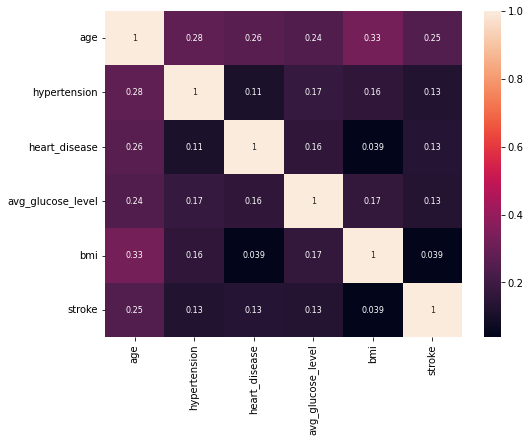

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(stroke_df.corr(), annot=True,
           vmax=1.0, linecolor='white',
            annot_kws={'fontsize':8 })
plt.show()

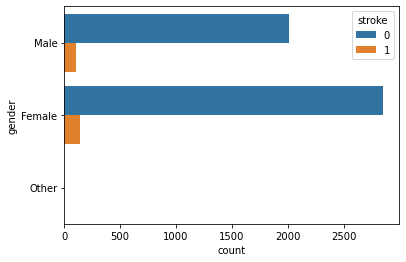

In [15]:
sns.countplot(y='gender', hue='stroke', data=stroke_df)
plt.show()
    
# sns.scatterplot(stroke_df, x='age', y='stroke', hue='gender')

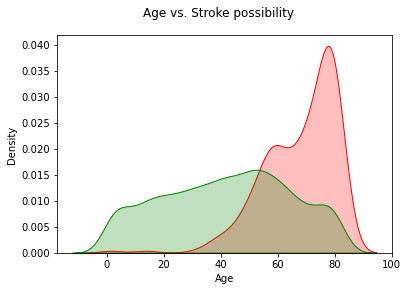

In [16]:
fig, ax = plt.subplots()

sns.kdeplot(stroke_df[stroke_df['stroke']==1]["age"], shade=True, color="red", label="Suffered", ax=ax)
sns.kdeplot(stroke_df[stroke_df['stroke']==0]["age"], shade=True, color="green", label="Not Suffered", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Stroke possibility");

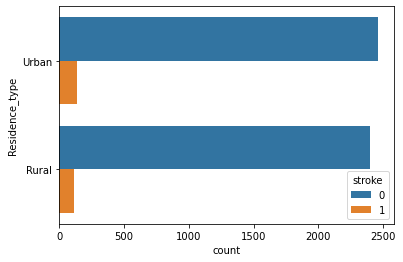

In [17]:
sns.countplot(y='Residence_type', hue='stroke', data=stroke_df)
plt.show()

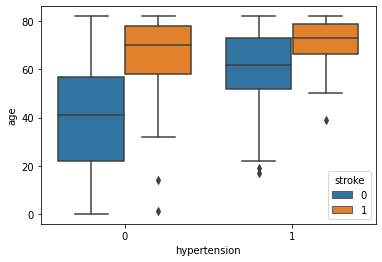

In [18]:
sns.boxplot(x='hypertension', y='age', hue='stroke', data=stroke_df)
plt.show()

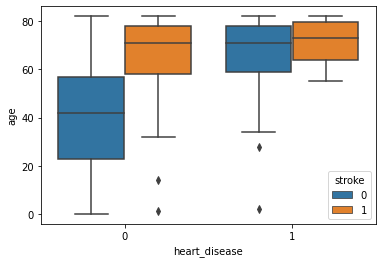

In [19]:
sns.boxplot(x='heart_disease', y='age', hue='stroke', data=stroke_df)
plt.show()

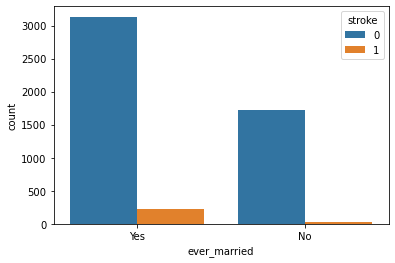

In [20]:
sns.countplot(x='ever_married', hue='stroke', data=stroke_df)

# sns.boxplot(x='ever_married', y='age', hue='stroke', data=stroke_df)
plt.show()

In [21]:
cat_cols = ['gender', 'ever_married','work_type','Residence_type','smoking_status']

In [22]:
stroke_df[cat_cols].nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [23]:
df_cat_encoded = pd.get_dummies(stroke_df[cat_cols], drop_first=True)

In [24]:
print(df_cat_encoded)

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0               1             0                 1                       0   
1               0             0                 1                       0   
2               1             0                 1                       0   
3               0             0                 1                       0   
4               0             0                 1                       0   
...           ...           ...               ...                     ...   
5105            0             0                 1                       0   
5106            0             0                 1                       0   
5107            0             0                 1                       0   
5108            1             0                 1                       0   
5109            0             0                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
0  

In [25]:
numeric_fields = list(set(stroke_df.columns) - set(cat_cols))

In [26]:
print(numeric_fields)

['hypertension', 'heart_disease', 'bmi', 'age', 'stroke', 'avg_glucose_level']


In [27]:
encoded_stroke_df = pd.concat([stroke_df[numeric_fields],df_cat_encoded], axis = 1)

In [28]:
print(cat_cols)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [29]:
print(encoded_stroke_df.head())

   hypertension  heart_disease        bmi   age  stroke  avg_glucose_level  \
0             0              1  36.600000  67.0       1             228.69   
1             0              0  28.893237  61.0       1             202.21   
2             0              1  32.500000  80.0       1             105.92   
3             0              0  34.400000  49.0       1             171.23   
4             1              0  24.000000  79.0       1             174.12   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                

In [30]:
x_fields = encoded_stroke_df.columns.tolist()
(x_fields.remove('stroke'))
print(x_fields)

['hypertension', 'heart_disease', 'bmi', 'age', 'avg_glucose_level', 'gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [31]:
X = encoded_stroke_df[x_fields]

In [32]:
Y = encoded_stroke_df['stroke']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=102)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 16)
(1533, 16)
(3577,)
(1533,)


In [34]:
# Logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [35]:
accuracy_score(y_pred, y_test)

0.7573385518590998

In [36]:
confusion_matrix(y_pred, y_test)

array([[1096,   20],
       [ 352,   65]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1448
           1       0.16      0.76      0.26        85

    accuracy                           0.76      1533
   macro avg       0.57      0.76      0.56      1533
weighted avg       0.94      0.76      0.82      1533



In [38]:
roc_auc_score(y_test, y_pred)

0.7608059798505037

In [39]:
pickle.dump(log_reg, open('models/stroke_predict_lg.pkl', 'wb'))

In [40]:
x1 = X_test[:1]

In [41]:
print(y_test.shape)

(1533,)


In [42]:
print(y_pred.sum())

417


In [43]:
print(x1.to_dict())

{'hypertension': {3219: 0}, 'heart_disease': {3219: 0}, 'bmi': {3219: 30.3}, 'age': {3219: 73.0}, 'avg_glucose_level': {3219: 65.93}, 'gender_Male': {3219: 0}, 'gender_Other': {3219: 0}, 'ever_married_Yes': {3219: 1}, 'work_type_Never_worked': {3219: 0}, 'work_type_Private': {3219: 0}, 'work_type_Self-employed': {3219: 0}, 'work_type_children': {3219: 0}, 'Residence_type_Urban': {3219: 0}, 'smoking_status_formerly smoked': {3219: 0}, 'smoking_status_never smoked': {3219: 1}, 'smoking_status_smokes': {3219: 0}}


In [44]:
print(x1.shape)

(1, 16)


In [46]:
# 2nd model approach: Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight='balanced').fit(X_train, y_train)

In [47]:
y_hat = clf.predict(X_test)

In [48]:
print(y_hat.sum())

65


In [49]:
accuracy_score(y_hat, y_test)

0.9178082191780822

In [50]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1448
           1       0.18      0.14      0.16        85

    accuracy                           0.92      1533
   macro avg       0.57      0.55      0.56      1533
weighted avg       0.91      0.92      0.91      1533



In [51]:
roc_auc_score(y_test, y_hat)

0.5522871303217419

In [52]:
pickle.dump(clf, open('models/stroke_predict_dtc.pkl', 'wb'))

In [53]:
# model = pickle.load(open('models/stroke_predict.pickle', 'rb'))

In [54]:
# 3rd model approach RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(random_state=202)

In [56]:
rfc.fit(X, Y)

RandomForestClassifier(random_state=202)

In [57]:
y_hat_rfc = rfc.predict(X_test)

In [58]:
accuracy_score(y_test, y_hat_rfc)

1.0

In [59]:
roc_auc_score(y_hat_rfc, y_test)

1.0

In [60]:
print(classification_report(y_test, y_hat_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1448
           1       1.00      1.00      1.00        85

    accuracy                           1.00      1533
   macro avg       1.00      1.00      1.00      1533
weighted avg       1.00      1.00      1.00      1533



In [61]:
pickle.dump(rfc, open('models/stroke_predict_rfc.pkl', 'wb'))

In [62]:
y_hat_rfc.sum()

85

In [63]:
y_hat_rfc.size

1533

In [93]:
# import bentoml

In [64]:
# bentoml.sklearn.save_model('stroke_predict_model', rfc)